In [5]:
import pandas as pd

ord = pd.read_csv('/Users/mcmlxviii/Documents/NYCDS Academy/machine_learning/Machine_Learning_Lab/data/Orders.csv')
ret = pd.read_csv('/Users/mcmlxviii/Documents/NYCDS Academy/machine_learning/Machine_Learning_Lab/data/Returns.csv')

### Convert Profit and Sales to Numeric Type

In [7]:
ord.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [13]:
ord['Sales'] = ord['Sales'].str.replace('$', '')
ord['Sales'] = ord['Sales'].str.replace(',', '')
ord['Profit'] = ord['Profit'].str.replace('$', '')
ord['Profit'] = ord['Profit'].str.replace(',', '')
ord['Sales'] = ord['Sales'].astype(float)
ord['Profit'] = ord['Profit'].astype(float)
ord.head()

/var/folders/kb/xz2_dkt914d1mkb8_lsxl6_w0000gn/T/ipykernel_45394/583535113.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ord['Sales'] = ord['Sales'].str.replace('$', '')
/var/folders/kb/xz2_dkt914d1mkb8_lsxl6_w0000gn/T/ipykernel_45394/583535113.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ord['Profit'] = ord['Profit'].str.replace('$', '')


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


### Problem(2) INVENTORY MANAGEMENT

In [15]:
ord.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [20]:
len( ord['Product.ID'].unique() )
type( ord['Order.Date'][1])

str

In [25]:
ord['Order.Date'] = pd.to_datetime(ord['Order.Date'])
ord['Ship.Date']  = pd.to_datetime(ord['Ship.Date'])

In [34]:
# CREATE SEASON COLUMN
#(ord['Order.Date'][1].month, ord['Order.Date'][1].day)
ord['month'] = ord['Order.Date'].dt.month

In [35]:
ord.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11


In [38]:
ord['Sub.Category'].unique()

array(['Phones', 'Chairs', 'Copiers', 'Tables', 'Bookcases', 'Art',
       'Appliances', 'Storage', 'Fasteners', 'Machines', 'Accessories',
       'Furnishings', 'Binders', 'Labels', 'Paper', 'Supplies',
       'Envelopes'], dtype=object)

In [74]:
grpd_ord = ord.groupby( ['month'] )['Quantity'].sum()

In [76]:
grpd_ord.head(15)

month
1      8872
2      7429
3     10390
4     10466
5     13196
6     18009
7     11046
8     17596
9     20479
10    16303
11    22379
12    22147
Name: Quantity, dtype: int64

In [77]:
grpd2_ord = ord.groupby( ['month', 'Sub.Category'] )['Quantity'].sum()

In [81]:
grpd2_ord.tail(50)

month  Sub.Category
10     Appliances       485
       Art             1240
       Binders         1818
       Bookcases        816
       Chairs          1248
       Copiers          769
       Envelopes        762
       Fasteners        921
       Furnishings      965
       Labels           934
       Machines         535
       Paper           1149
       Phones          1152
       Storage         1466
       Supplies         810
       Tables           294
11     Accessories     1443
       Appliances       796
       Art             1884
       Binders         2733
       Bookcases        982
       Chairs          1620
       Copiers          843
       Envelopes       1019
       Fasteners       1188
       Furnishings     1484
       Labels          1171
       Machines         599
       Paper           1604
       Phones          1494
       Storage         2160
       Supplies         974
       Tables           385
12     Accessories     1452
       Appliances       757


<AxesSubplot:xlabel='month'>

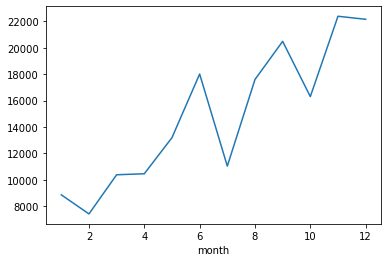

In [87]:
grpd_ord.plot()

### Problem(3) RETURNS

In [102]:
# CREATE A NEW COLUMN FOR YEAR
ord['year'] = ord['Order.Date'].dt.year

In [105]:
filt = ( ord['Order.ID'].isin(ret['Order ID']) )
returns = ord[ filt ]

In [106]:
returns.groupby(['year'])['Profit'].sum()

year
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64

In [225]:
pd.set_option('display.max_columns', 500)

In [130]:
cust_freq = returns['Customer.ID'].value_counts().sort_values(ascending=False)
cf = pd.DataFrame(cust_freq)

In [172]:
cust_freq = returns.groupby('Customer.ID')['Segment'].count().sort_values(ascending=False)

In [173]:
cust_freq.head(20)

Customer.ID
PO-1885082      13
JK-1609027      11
TB-2140066      10
MY-1829582      10
SG-200801404     9
KH-165101404     9
AJ-1096031       8
SN-1056095       8
SS-2059059       8
JP-1552045       8
PB-19210127      8
HD-1478598       8
JE-1561097       7
DL-12925101      7
BT-1139564       7
ES-1408018       7
EH-137651404     7
DH-130751404     7
AT-1073545       7
BM-1114055       7
Name: Segment, dtype: int64

In [180]:
count = 0
for i in range(len(cust_freq)):
      if cust_freq[i] > 1:
            count = count + 1

In [181]:
# COUNTS GREATER THAN 1
count

547

In [179]:
# RETURNS GREATER THAN 5
count

46

In [128]:
for i in range(len(cust_freq)):
    if cust_freq[i] > 5:
        print(cust_freq)

PO-1885082      13
JK-1609027      11
MY-1829582      10
TB-2140066      10
KH-165101404     9
                ..
JD-6015134       1
SR-204251408     1
CG-1204031       1
HP-1481582       1
PM-894038        1
Name: Customer.ID, Length: 1061, dtype: int64
PO-1885082      13
JK-1609027      11
MY-1829582      10
TB-2140066      10
KH-165101404     9
                ..
JD-6015134       1
SR-204251408     1
CG-1204031       1
HP-1481582       1
PM-894038        1
Name: Customer.ID, Length: 1061, dtype: int64
PO-1885082      13
JK-1609027      11
MY-1829582      10
TB-2140066      10
KH-165101404     9
                ..
JD-6015134       1
SR-204251408     1
CG-1204031       1
HP-1481582       1
PM-894038        1
Name: Customer.ID, Length: 1061, dtype: int64
PO-1885082      13
JK-1609027      11
MY-1829582      10
TB-2140066      10
KH-165101404     9
                ..
JD-6015134       1
SR-204251408     1
CG-1204031       1
HP-1481582       1
PM-894038        1
Name: Customer.ID, Length:

### regions more likely to return orders

In [187]:
returns['Region'].value_counts().sort_values(ascending=False)
# Central America

Central America      248
Western Europe       233
Western US           177
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            74
Caribbean             69
Western Africa        60
North Africa          51
Eastern Europe        42
Southern Africa       25
Eastern Africa        18
Central Africa        17
Canada                15
Central Asia           9
Name: Region, dtype: int64

### Categories/Sub-Categories most likely returned

In [190]:
returns['Category'].value_counts().sort_values(ascending=False)

Office Supplies    1348
Technology          445
Furniture           427
Name: Category, dtype: int64

In [189]:
returns['Sub.Category'].value_counts().sort_values(ascending=False)

Binders        269
Art            217
Storage        212
Paper          150
Chairs         147
Phones         145
Accessories    138
Labels         137
Furnishings    135
Bookcases      104
Supplies       103
Fasteners      102
Envelopes       99
Copiers         99
Machines        63
Appliances      59
Tables          41
Name: Sub.Category, dtype: int64

In [209]:
ord['Returned'] = 0
filt = ( ord['Order.ID'].isin(ret['Order ID']) )

In [193]:
ord.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,year,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,2014,False
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,2014,False
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,2014,False
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,2014,False
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11,2014,False


In [210]:
ord[ filt ].Returned = 1

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [200]:
from sklearn.utils import shuffle

In [206]:
shuffle(ord).head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,year,Returned
32190,15814,IT-2013-LD16855125-41552,2013-10-05,2013-10-12,Standard Class,LD-16855125,Lela Donovan,Corporate,NaN,Lausanne,...,"Fellowes Box, Industrial",60.48,3,0.0,2.97,4.58,Medium,10,2013,0
22463,20220,ES-2013-JE15715139-41544,2013-09-27,2013-09-29,First Class,JE-15715139,Joe Elijah,Consumer,NaN,Chester,...,"Ames Business Envelopes, Security-Tint",58.56,4,0.0,19.80,10.15,High,9,2013,0


In [213]:
ord['Returned'].value_counts()

0    51290
Name: Returned, dtype: int64

In [233]:
count = 0
for index, row in ord.iterrows():
    if (ord.at[index, ['Order.ID']].isin(ret['Order ID'])==True):
        print(ord.loc[index, ['Order.ID']])
        if index == 2:
            break
        #ord.loc[index, 'Returned'] = 1

TypeError: unhashable type: 'list'

In [219]:
returns = returns.rename(columns={'Order ID': 'Order.ID'})

In [218]:
df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'month', 'year'],
      dtype='object')

In [221]:
#merged = ord.merge(returns[['Returned', 'Order.ID']], how='left', on='Order.ID')
mergedDf = ord.merge(returns, on='Order.ID')

In [227]:
mergedDf['Returned'].value_counts()

0    6992
Name: Returned, dtype: int64